In [1]:
!pip install --no-cache-dir numpy==1.26.4 pandas==2.2.1
!pip install --no-cache-dir tensorflow==2.15.0


import numpy as np
import pandas as pd
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\jialu\\anaconda3\\Lib\\site-packages\\tensorflow\\compiler\\mlir\\quantization\\tensorflow\\python\\pywrap_quantize_model.pyd'
Consider using the `--user` option or check the permissions.



   ---------------------------------------- 300.8/300.8 MB 6.4 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-intel
    Found existing installation: tensorflow-intel 2.14.0
    Uninstalling tensorflow-intel-2.14.0:
      Successfully uninstalled tensorflow-intel-2.14.0
  Rolling back uninstall of tensorflow-intel
  Moving to c:\users\jialu\anaconda3\lib\site-packages\tensorflow\__init__.py
   from C:\Users\jialu\AppData\Local\Temp\pip-uninstall-0ekm9_9j\__init__.py
  Moving to c:\users\jialu\anaconda3\lib\site-packages\tensorflow\__pycache__\
   from C:\Users\jialu\anaconda3\Lib\site-packages\tensorflow\~-pycache__
  Moving to c:\users\jialu\anaconda3\lib\site-packages\tensorflow\_api\__init__.py
   from C:\Users\jialu\AppData\Local\Temp\pip-uninstall-0ekm9_9j\_api\__init__.py
  Moving to c:\users\jialu\anaconda3\lib\site-packages\tensorflow\_api\__pycache__\
   from C:\Users\jialu\anaconda3\Lib\site-packages\tensorflow\_api\~-pycache__
  Moving to c:\users\jialu\anaconda3\lib\sit

C:\Users\jialu\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\jialu\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


NumPy version: 1.26.4
Pandas version: 2.2.1


In [2]:
import pandas as pd

import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np
import seaborn as sns
%matplotlib inline

pd.options.display.max_colwidth = 100

import random
import os

from numpy.random import seed
seed(42)

random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
print("GPU Available:", bool(gpus))
print("Num GPUs Available:", len(gpus))
print("TensorFlow version:", tf.__version__)

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import glob


from tensorflow.random import set_seed
set_seed(42)

import warnings
warnings.filterwarnings('ignore')

C:\Users\jialu\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"



GPU Available: False
Num GPUs Available: 0
TensorFlow version: 2.15.0


In [3]:
IMG_SIZE = 224
BATCH = 32
SEED = 42
main_path = "C:/Users/jialu/DSA4262/diffusion"

train_covid = "C:/Users/jialu/DSA4262/diffusion/train/COVID19"
train_normal = "C:/Users/jialu/DSA4262/diffusion/train/NORMAL"
train_pneumonia ="C:/Users/jialu/DSA4262/diffusion/train/PNEUMONIA"
train_tuber = "C:/Users/jialu/DSA4262/DIFFUSION/train/TURBERCULOSIS"

test_covid = "C:/Users/jialu/DSA4262/DIFFUSION/test/COVID19"
test_normal = "C:/Users/jialu/DSA4262/DIFFUSION/test/NORMAL"
test_pneumonia = "C:/Users/jialu/DSA4262/DIFFUSION/test/PNEUMONIA"
test_tuber = "C:/Users/jialu/DSA4262/DIFFUSION/test/TURBERCULOSIS"


train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])
train_list.extend([x for x in train_covid])
train_list.extend([x for x in train_tuber])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia), ['Covid-19']*len(train_covid), ['Tuberculosis']*len(train_tuber)], ), columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])
test_list.extend([x for x in test_covid])
test_list.extend([x for x in test_tuber])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia), ['Covid-19']*len(test_covid), ['Tuberculosis']*len(test_tuber)], ), columns = ['class'])
df_test['image'] = [x for x in test_list]




#train_df, val_df = train_test_split(df_train, test_size = 0.20, random_state = SEED, stratify = df_train['class'])

In [5]:
import os
import pandas as pd
import numpy as np

IMG_SIZE = 224
BATCH = 32
SEED = 42
main_path = "C:/Users/jialu/DSA4262/GAN"

# Paths to the image folders
train_covid = os.path.join(main_path, "train/COVID19")
train_normal = os.path.join(main_path, "train/NORMAL")
train_pneumonia = os.path.join(main_path, "train/PNEUMONIA")
train_tuber = os.path.join(main_path, "train/TURBERCULOSIS")

test_covid = os.path.join(main_path, "test/COVID19")
test_normal = os.path.join(main_path, "test/NORMAL")
test_pneumonia = os.path.join(main_path, "test/PNEUMONIA")
test_tuber = os.path.join(main_path, "test/TURBERCULOSIS")


# Helper function to create labeled dataframe
def create_df(normal_path, pneumonia_path, covid_path, tuber_path):
    normal_files = [os.path.join(normal_path, x) for x in os.listdir(normal_path)]
    pneumonia_files = [os.path.join(pneumonia_path, x) for x in os.listdir(pneumonia_path)]
    covid_files = [os.path.join(covid_path, x) for x in os.listdir(covid_path)]
    tuber_files = [os.path.join(tuber_path, x) for x in os.listdir(tuber_path)]

    images = normal_files + pneumonia_files + covid_files + tuber_files
    labels = (['Normal'] * len(normal_files) +
              ['Pneumonia'] * len(pneumonia_files) +
              ['Covid-19'] * len(covid_files) +
              ['Tuberculosis'] * len(tuber_files))
    
    return pd.DataFrame({'image': images, 'class': labels})

# Create DataFrames
df_train = create_df(train_normal, train_pneumonia, train_covid, train_tuber)
df_test = create_df(test_normal, test_pneumonia, test_covid, test_tuber)
#train_df, val_df = train_test_split(df_train, test_size = 0.20, random_state = SEED, stratify = df_train['class'])

In [8]:
from sklearn.model_selection import train_test_split

# Stratified 85/15 split by class
train_df, val_df = train_test_split(
    df_train,
    test_size=0.15,
    stratify=df_train['class'],  # preserve class distribution
    random_state=42
)
print("Training set class counts:")
print(train_df['class'].value_counts())
print("\nValidation set class counts:")
print(val_df['class'].value_counts())

Training set class counts:
class
Normal          3294
Tuberculosis    3294
Covid-19        3294
Pneumonia       3293
Name: count, dtype: int64

Validation set class counts:
class
Pneumonia       582
Normal          581
Tuberculosis    581
Covid-19        581
Name: count, dtype: int64


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Generators with basic augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

# Training data generator
train_ds = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image',
    y_col='class',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH,
    class_mode='categorical',
    shuffle=True,
    seed=SEED
)

# Validation data generator
val_ds = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='image',
    y_col='class',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH,
    class_mode='categorical',
    shuffle=False
)


Found 13175 validated image filenames belonging to 4 classes.
Found 2325 validated image filenames belonging to 4 classes.


In [10]:
print(len(train_ds))
print(len(val_ds))

412
73


In [11]:
#need to split the train and validation data
#ds_train, ds_val, 

IMG_SIZE = 224
BATCH = 32
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)



base_model = tf.keras.applications.ResNet152V2(
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)

base_model.trainable = False

def get_pretrained():
    
    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    x = base_model(inputs)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    
    #Final Layer (Output)
    output = layers.Dense(4, activation='softmax')(x)

    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model
keras.backend.clear_session()

model_pretrained = get_pretrained()
model_pretrained.compile(loss='categorical_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=5e-5), metrics=['accuracy'])

model_pretrained.summary()
history = model_pretrained.fit(train_ds,
          batch_size = BATCH, epochs = 50,
          validation_data=val_ds,
          #callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_ds)/BATCH),
          validation_steps=(len(val_ds)/BATCH)
        )



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                           

12/12 [==============================] - 113s 9s/step - loss: 0.2404 - accuracy: 0.9135 - val_loss: 0.2167 - val_accuracy: 0.9375
Epoch 44/50
12/12 [==============================] - 111s 9s/step - loss: 0.2510 - accuracy: 0.9087 - val_loss: 0.2114 - val_accuracy: 0.9375
Epoch 45/50
12/12 [==============================] - 109s 9s/step - loss: 0.1967 - accuracy: 0.9375 - val_loss: 0.2257 - val_accuracy: 0.9167
Epoch 46/50
12/12 [==============================] - 113s 9s/step - loss: 0.2357 - accuracy: 0.9207 - val_loss: 0.2341 - val_accuracy: 0.9062
Epoch 47/50
12/12 [==============================] - 116s 9s/step - loss: 0.2012 - accuracy: 0.9495 - val_loss: 0.1977 - val_accuracy: 0.9271
Epoch 48/50
12/12 [==============================] - 110s 9s/step - loss: 0.2147 - accuracy: 0.9495 - val_loss: 0.2174 - val_accuracy: 0.9167
Epoch 49/50
12/12 [==============================] - 113s 9s/step - loss: 0.2313 - accuracy: 0.9351 - val_loss: 0.2167 - val_accuracy: 0.9167
Epoch 50/50
12/12 

Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: c:\users\jialu\anaconda3\lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 


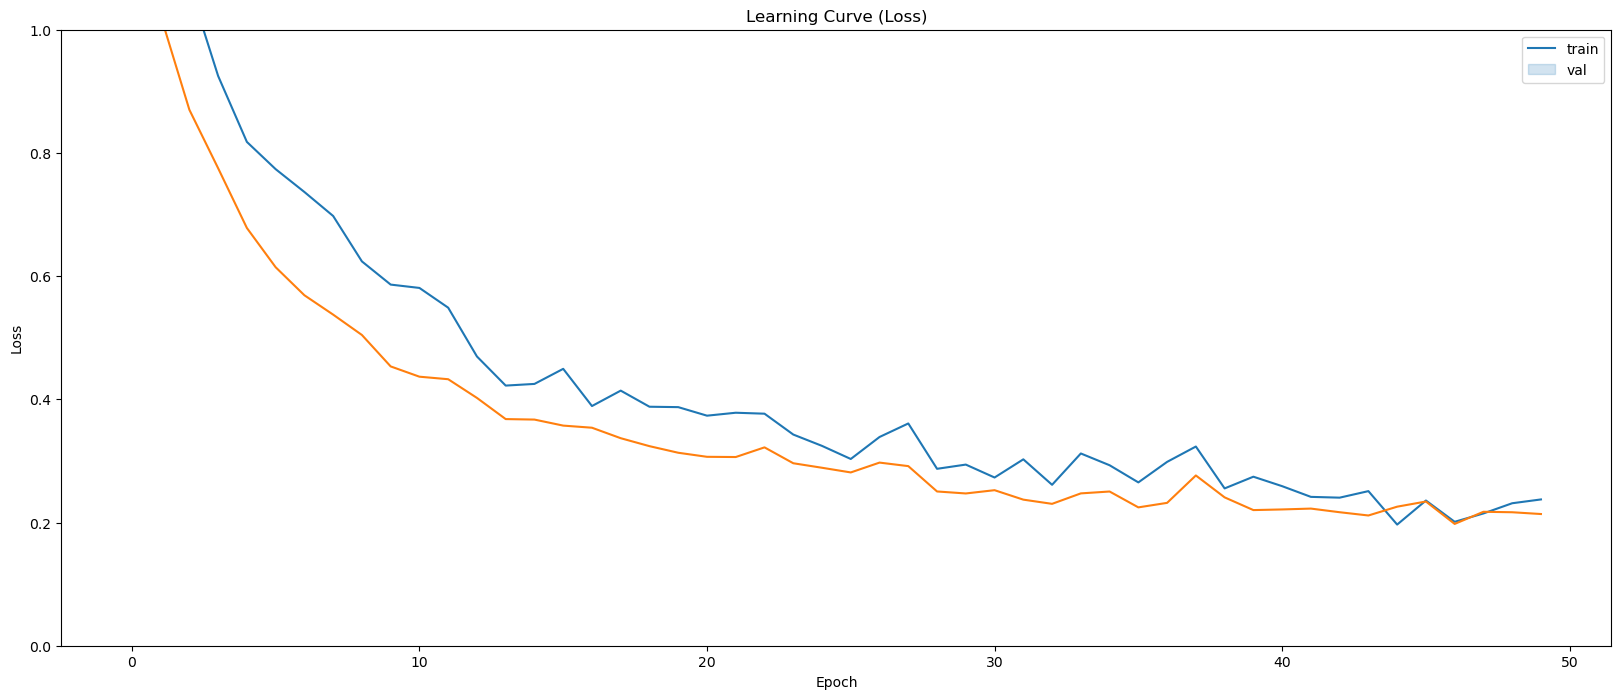

In [12]:
import seaborn as sns
!pip show seaborn



fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 1)
ax.legend(['train', 'val'], loc='best')
plt.show()

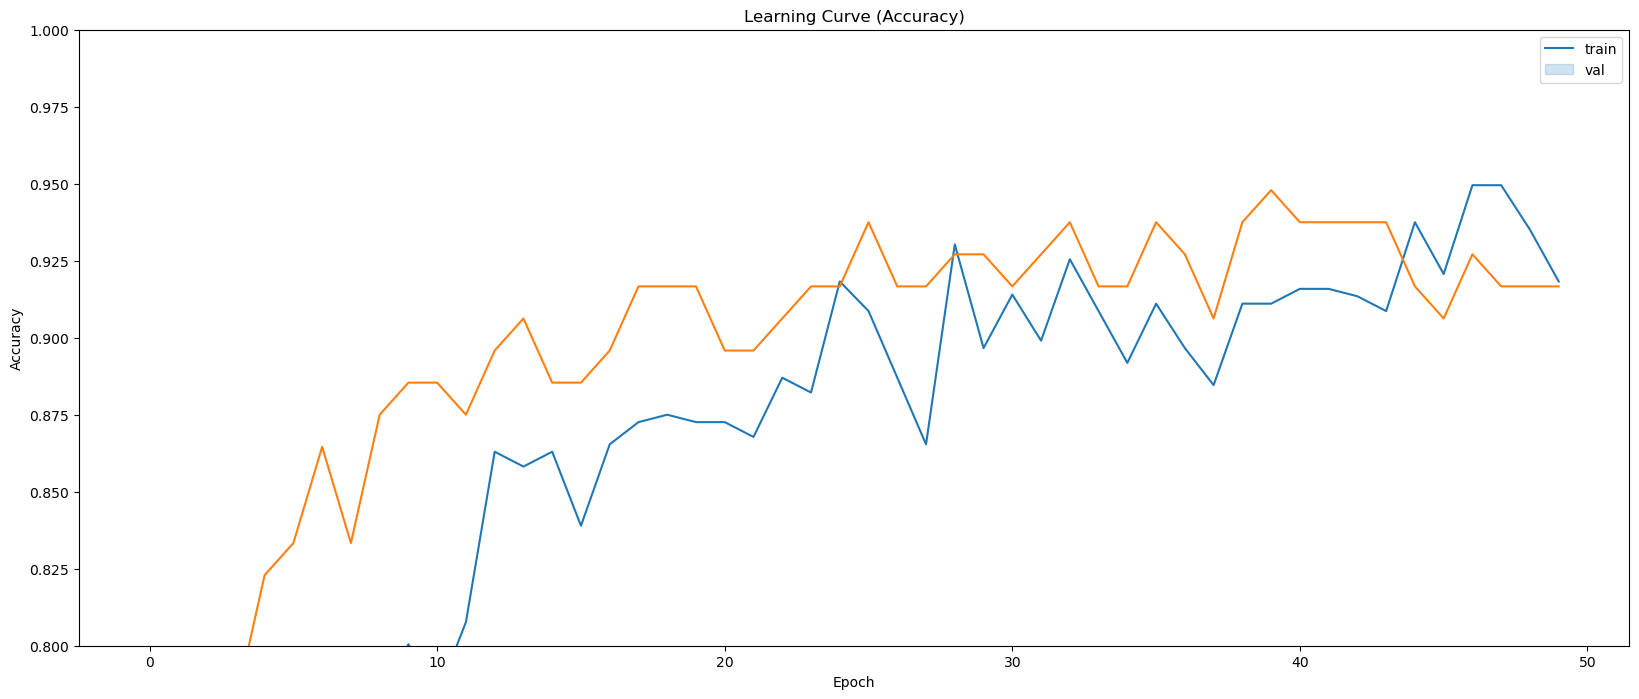

In [13]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [14]:
score = model_pretrained.evaluate(val_ds,  verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.1984282284975052
Val accuracy: 0.9415053725242615


In [15]:
# Test data generator (no augmentation, just rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

test_ds = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='image',        # column with image file paths
    y_col='class',        # column with true labels
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH,
    class_mode='categorical',  # or 'binary' if you have two classes
    shuffle=False           # Important for evaluation – keeps order
)


Found 771 validated image filenames belonging to 4 classes.


In [16]:
score = model_pretrained.evaluate(test_ds, steps = len(test_ds), verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5153156518936157
Test accuracy: 0.7976653575897217
